## Exploratory data analysis file pre-modelling

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### read cleaned data frame

In [2]:
df = pd.read_feather('../data/processed/clean_ft_table')

In [3]:
df_features = df.copy()

In [4]:
df_features.drop(['hadm_id','endtime'],axis=1,inplace=True)

In [5]:
df_features

,time_on_vent,re_intub_class,gender,admission_type,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,659.416667,0,F,URGENT,70,0.0,127.0,11.631239,167.4,102.0,2.000000,7.314369,59.027559,0.0,37.500000,7.120393,94.0
1,25.983333,0,F,EW EMER.,72,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
2,17.000000,0,M,EW EMER.,23,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
3,580.233333,0,F,EW EMER.,81,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
4,170.000000,0,F,URGENT,65,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,134.333333,1,F,EW EMER.,68,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
8912,14.783333,1,M,EW EMER.,65,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
8913,73.466667,1,F,DIRECT EMER.,65,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
8914,218.083333,1,F,EW EMER.,53,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [6]:
from scipy.stats import shapiro, normaltest

In [7]:
df_continuous = df_features.copy()

In [8]:
df_continuous.drop(['re_intub_class','gender','admission_type'],axis=1,inplace=True)

In [9]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,659.416667,70,0.0,127.0,11.631239,167.4,102.0,2.000000,7.314369,59.027559,0.0,37.500000,7.120393,94.0
1,25.983333,72,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
2,17.000000,23,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
3,580.233333,81,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
4,170.000000,65,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,134.333333,68,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
8912,14.783333,65,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
8913,73.466667,65,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
8914,218.083333,53,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [10]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,8677.660271,3.602963e+02,2792.832999,2.693993e+02,18743.22479,2607.532062,3772.117781,16255.963325,34840.247725,3709.157447,34773.569903,19636.662168,14319.077885,14448.371594
1,0.000000,5.789632e-79,0.000000,3.167211e-59,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,0.604474,9.737274e-01,0.953716,9.887956e-01,0.548087,0.925026,0.92886,0.480119,0.002853,0.73952,0.01079,0.215123,0.513535,0.619178
1,0.000000,1.736468e-37,0.000000,6.108287e-26,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000


#### importantly, no columns appear to be normally distributed using either normality test

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

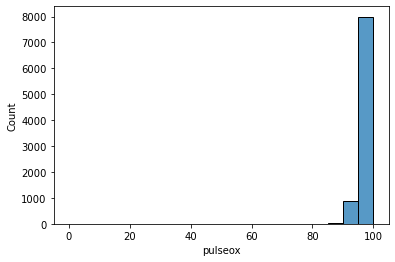

In [12]:
sns.histplot(df_features['pulseox'], bins = 20)

#### Remove outliers by removing all values with a zscore +/- 4

In [13]:
summary_stats = df_continuous.describe()

In [15]:
summary_stats

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
count,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000,8916.000000
mean,97.817958,62.070323,19.246617,85.949417,4.479944,185.100285,81.736878,1.158060,10.088097,66.530167,494.665161,36.991512,8.813587,97.649507
std,141.165741,16.231828,6.035288,17.166801,3.572215,54.979533,15.994919,1.415632,371.866637,5.480687,2650.967277,1.676585,7.981953,3.035511
min,6.016667,18.000000,0.000000,0.000000,0.000000,2.200000,3.000000,0.000000,0.000000,0.000000,0.000000,-17.777778,0.000000,0.000000
25%,18.741667,53.000000,15.000000,74.000000,2.478479,148.700000,71.000000,0.516398,3.286335,64.086614,373.000000,36.722222,5.034916,96.000000
50%,46.875000,64.000000,19.000000,85.000000,3.844704,176.000000,80.000000,0.957427,5.115336,66.964567,454.000000,37.000000,7.310788,98.000000
75%,121.000000,74.000000,23.000000,97.000000,6.041523,213.400000,90.000000,1.516575,7.763161,70.039370,550.000000,37.388889,10.496031,100.000000
max,2389.733333,91.000000,110.000000,173.000000,160.603722,605.000000,314.000000,42.949971,35117.028773,175.098425,250264.000000,40.000000,296.433466,100.000000


In [17]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,659.416667,70,0.0,127.0,11.631239,167.4,102.0,2.000000,7.314369,59.027559,0.0,37.500000,7.120393,94.0
1,25.983333,72,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
2,17.000000,23,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
3,580.233333,81,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
4,170.000000,65,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,134.333333,68,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
8912,14.783333,65,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
8913,73.466667,65,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
8914,218.083333,53,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [22]:
cols = list(df_continuous.columns)
df_new = df_continuous.copy()
for col in cols:
    df_new[col] = (df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()

In [24]:
for col in cols:
    df_continuous[col] = np.where(((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()>4)|
                                  ((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()<-4),
                                  np.NaN,df_continuous[col])

In [25]:
df_continuous.isnull().sum()

time_on_vent         85
anchor_age            0
spontrr              14
heartrate            11
std_spontrr          13
weight               46
bloodpressure        25
std_pulseox          42
std_heartrate         1
height               39
tidalvolume           1
temp                 16
std_bloodpressure    67
pulseox              25
dtype: int64

In [26]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,659.416667,70.0,0.0,127.0,11.631239,167.4,102.0,2.000000,7.314369,59.027559,0.0,37.500000,7.120393,94.0
1,25.983333,72.0,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
2,17.000000,23.0,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
3,580.233333,81.0,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
4,170.000000,65.0,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,134.333333,68.0,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
8912,14.783333,65.0,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
8913,73.466667,65.0,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
8914,218.083333,53.0,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [28]:
df_continuous.dropna(inplace=True)

In [29]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,3791.133913,3.492495e+02,1.757617e+02,2.180972e+02,8.702388e+02,9.354729e+02,6.952267e+02,1998.005601,3777.939907,7.758875e+01,5622.266544,5.719633e+02,2799.296672,1.338147e+03
1,0.000000,1.450238e-76,6.820742e-39,4.373214e-48,1.071655e-189,7.322087e-204,1.080019e-151,0.000000,0.000000,1.418457e-17,0.000000,6.305962e-125,0.000000,2.661770e-291


In [30]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,0.737287,9.734839e-01,9.897172e-01,9.901886e-01,0.94102,9.642792e-01,9.722561e-01,0.914982,0.851447,9.864416e-01,0.908914,9.735473e-01,0.88732,0.867297
1,0.000000,4.992076e-37,1.957498e-24,6.984620e-24,0.00000,1.472625e-41,1.065891e-37,0.000000,0.000000,7.931565e-28,0.000000,5.414971e-37,0.00000,0.000000


<AxesSubplot:xlabel='heartrate', ylabel='Count'>

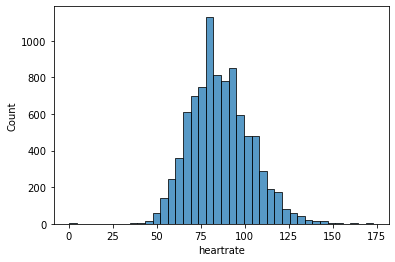

In [39]:
sns.histplot(df_features['heartrate'], bins = 40)

In [33]:
df_continuous.describe()

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
count,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000
mean,89.006505,62.170111,19.148589,85.796147,4.397089,183.345854,81.437186,1.088568,6.123449,66.648293,467.886538,37.059659,8.262858,97.737653
std,106.448756,16.229313,5.729717,16.926635,2.479415,50.583912,14.903536,0.839010,4.270365,4.136275,170.366419,0.576866,4.695490,2.311696
min,6.016667,18.000000,0.000000,37.000000,0.000000,2.200000,36.000000,0.000000,0.000000,46.031496,0.000000,33.777778,0.000000,86.000000
25%,18.500000,53.000000,15.000000,74.000000,2.451757,148.300000,71.000000,0.516398,3.287784,64.086614,374.000000,36.722222,4.996666,96.000000
50%,45.983333,64.000000,19.000000,84.000000,3.829708,176.000000,79.000000,0.943880,5.115336,66.964567,454.000000,37.000000,7.245688,98.000000
75%,116.933333,74.000000,23.000000,97.000000,6.023762,212.100000,90.000000,1.511858,7.756718,70.039370,550.000000,37.388889,10.347133,100.000000
max,659.566667,91.000000,43.000000,154.000000,16.694310,404.800000,144.000000,6.550173,41.993452,81.944882,4775.000000,40.000000,38.716921,100.000000


In [42]:
#df_continuous.reset_index(inplace=True)
#df_continuous.drop('index',axis=1,inplace=True)
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,659.416667,70.0,0.0,127.0,11.631239,167.4,102.0,2.000000,7.314369,59.027559,0.0,37.500000,7.120393,94.0
1,25.983333,72.0,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
2,17.000000,23.0,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
3,580.233333,81.0,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
4,170.000000,65.0,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,10.416667,85.0,15.0,71.0,1.870829,139.5,69.0,0.755929,11.250397,66.964567,498.0,36.888889,3.817254,100.0
8561,134.333333,68.0,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
8562,14.783333,65.0,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
8563,73.466667,65.0,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0


In [45]:
df_categorical = df_features.copy()
df_categorical = df_features[['re_intub_class','gender','admission_type']]

In [47]:
df_to_model = pd.merge(left = df_continuous, right=df_categorical, how = 'inner',left_index = True, right_index = True)

In [49]:
df_to_model

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox,re_intub_class,gender,admission_type
0,659.416667,70.0,0.0,127.0,11.631239,167.4,102.0,2.000000,7.314369,59.027559,0.0,37.500000,7.120393,94.0,0,F,URGENT
1,25.983333,72.0,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0,0,F,EW EMER.
2,17.000000,23.0,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0,0,M,EW EMER.
3,580.233333,81.0,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0,0,F,EW EMER.
4,170.000000,65.0,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0,0,F,URGENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,10.416667,85.0,15.0,71.0,1.870829,139.5,69.0,0.755929,11.250397,66.964567,498.0,36.888889,3.817254,100.0,1,F,EW EMER.
8561,134.333333,68.0,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0,1,M,URGENT
8562,14.783333,65.0,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0,1,F,URGENT
8563,73.466667,65.0,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0,1,F,EW EMER.


In [50]:
df_to_model.to_feather('../data/processed/df_to_model')